## Import Packages

In [5]:
!pip install opencv-python

     |████████████████████████████████| 50.4 MB 8.1 MB/s eta 0:00:011
You should consider upgrading via the '/home/lucas/Documents/data-science/data-science-env/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 14.3 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1


In [1]:
# Imports
import os
import cv2
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
import keras

In [2]:
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from numpy.random import randn
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU, Reshape, Conv2DTranspose
from numpy.random import randn
from numpy import vstack
%matplotlib inline

In [12]:
!pip install -q -U watermark

In [3]:
# Packages version
%reload_ext watermark
%watermark -a "Lucas" --iversions

Author: Lucas

autopep8  : 1.5.6
numpy     : 1.19.5
pandas    : 1.2.3
cv2       : 4.5.1
matplotlib: 3.3.4
json      : 2.0.9
keras     : 2.4.3
tensorflow: 2.4.1



## Loading and Optimization Images

In [4]:
# Reading images
lista_imagens = glob('dados/*.jpg')
lista_imagens

['dados/img_107.jpg',
 'dados/img_130.jpg',
 'dados/img_131.jpg',
 'dados/img_138.jpg',
 'dados/img_145.jpg',
 'dados/img_157.jpg',
 'dados/img_162.jpg',
 'dados/img_163.jpg',
 'dados/img_172.jpg',
 'dados/img_175.jpg',
 'dados/img_192.jpg',
 'dados/img_200.jpg',
 'dados/img_203.jpg',
 'dados/img_206.jpg',
 'dados/img_207.jpg',
 'dados/img_208.jpg',
 'dados/img_213.jpg',
 'dados/img_219.jpg',
 'dados/img_231.jpg',
 'dados/img_274.jpg',
 'dados/img_58.jpg',
 'dados/img_75.jpg',
 'dados/img_80.jpg',
 'dados/img_81.jpg',
 'dados/img_91.jpg',
 'dados/img_96.jpg',
 'dados/img_97.jpg',
 'dados/img_98.jpg']

In [5]:
array_imagens = []

In [6]:
for f1 in range(len(lista_imagens)):
    img = cv2.imread(lista_imagens[f1])[:,:,::-1]
    array_imagens.append(img)

In [7]:
len(lista_imagens)

28

In [8]:
# Images like pixels arrays
array_imagens

[array([[[ 86,  93, 101],
         [ 85,  92, 100],
         [ 85,  92, 100],
         ...,
         [141, 145, 146],
         [124, 128, 129],
         [232, 236, 237]],
 
        [[ 86,  93, 101],
         [ 85,  92, 100],
         [ 85,  92, 100],
         ...,
         [143, 147, 148],
         [128, 132, 133],
         [234, 238, 239]],
 
        [[ 86,  93, 101],
         [ 86,  93, 101],
         [ 85,  92, 100],
         ...,
         [143, 147, 148],
         [127, 131, 132],
         [232, 236, 237]],
 
        ...,
 
        [[ 23,  24,  19],
         [ 24,  25,  20],
         [ 26,  27,  22],
         ...,
         [103, 103, 101],
         [ 67,  68,  63],
         [234, 235, 230]],
 
        [[ 20,  21,  15],
         [ 22,  23,  17],
         [ 23,  24,  18],
         ...,
         [102, 102, 100],
         [ 67,  68,  63],
         [234, 235, 230]],
 
        [[ 17,  18,  12],
         [ 19,  20,  14],
         [ 21,  22,  16],
         ...,
         [102, 102, 100],
  

In [9]:
len(array_imagens)

28

In [10]:
array_imagens_np = np.array(array_imagens)

In [11]:
print(array_imagens_np.shape)

(28, 480, 640, 3)


In [12]:
# Spliting data between testing and training 
X_treino, X_teste = train_test_split(array_imagens_np, random_state = 42, test_size = 0.2)

In [13]:
X_treino.shape

(22, 480, 640, 3)

In [14]:
X_teste.shape

(6, 480, 640, 3)

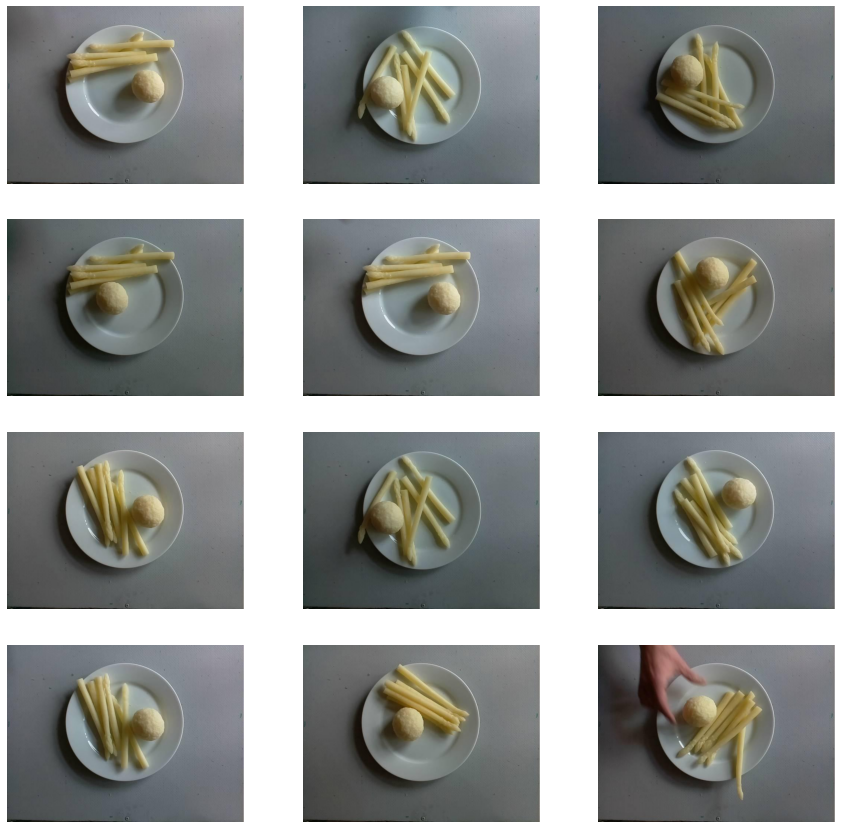

In [15]:
# Ploting some images of training
fig = plt.figure(figsize=(15,15))
columns = 3
rows = 4 
for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(X_treino[i])
    plt.axis('off')
plt.show()

In [16]:
tf.keras.backend.clear_session()

## Creating Model to generate the images above

In [21]:
# Defining Discriminator Model
def define_discriminator(in_shape=(480, 640, 3)):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), strides=(2, 2),
              padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same',))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same',))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same',))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same',))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
    return model

In [22]:
# Loading and preparing trainning images 
def load_real_images(dados_treino_x):
    X = dados_treino_x 
    X = X.astype('float32')
    X = X / 255.0
    return X

In [23]:
# Selecting Real Images
def generate_real_images(dataset, n_samples):
    ix = randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = ones((n_samples, 1))
    return X, y

In [24]:
# Generate fake images with labels
def generate_fake_images(n_samples):
    X = rand(480 * 640 * 3 * n_samples)
    X = X.reshape((n_samples, 480, 640, 3))
    y = zeros((n_samples, 1))
    return X, y

In [26]:
# Training discriminator model
def training_discriminator(model, dataset, n_iter = 100, n_batch = 6):
    
    half_batch = int(n_batch/2)
    
    # Generating Images Batches
    for i in range(n_iter):
        X_real, y_real = generate_real_images(dataset, half_batch)
        _, real_acc = model.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_images(half_batch)
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        print('>Epoch = %d Imagem real = %.0f%% Imagem Fake = %.0f%%' % (i+1, real_acc * 100, fake_acc * 100))

In [27]:
# Creating model
modelo = define_discriminator()

In [28]:
# Loading Dataset Training
dataset = load_real_images(X_treino)

In [29]:
# Training
training_discriminator(modelo, dataset)

>Epoch = 1 Imagem real = 0% Imagem Fake = 67%
>Epoch = 2 Imagem real = 67% Imagem Fake = 67%
>Epoch = 3 Imagem real = 33% Imagem Fake = 100%
>Epoch = 4 Imagem real = 67% Imagem Fake = 67%
>Epoch = 5 Imagem real = 67% Imagem Fake = 67%
>Epoch = 6 Imagem real = 67% Imagem Fake = 33%
>Epoch = 7 Imagem real = 100% Imagem Fake = 100%
>Epoch = 8 Imagem real = 67% Imagem Fake = 100%
>Epoch = 9 Imagem real = 33% Imagem Fake = 67%
>Epoch = 10 Imagem real = 67% Imagem Fake = 33%
>Epoch = 11 Imagem real = 33% Imagem Fake = 33%
>Epoch = 12 Imagem real = 100% Imagem Fake = 67%
>Epoch = 13 Imagem real = 67% Imagem Fake = 67%
>Epoch = 14 Imagem real = 67% Imagem Fake = 100%
>Epoch = 15 Imagem real = 33% Imagem Fake = 67%
>Epoch = 16 Imagem real = 0% Imagem Fake = 100%
>Epoch = 17 Imagem real = 0% Imagem Fake = 100%
>Epoch = 18 Imagem real = 33% Imagem Fake = 33%
>Epoch = 19 Imagem real = 0% Imagem Fake = 33%
>Epoch = 20 Imagem real = 33% Imagem Fake = 67%
>Epoch = 21 Imagem real = 67% Imagem Fake = 6

In [30]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 320, 16)      448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 240, 320, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 240, 320, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 160, 32)      4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 160, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 80, 32)        9

In [31]:
# Defining Generator Model
def define_generator(latent_dim):
    
    model = Sequential()
    n_nodes = 512 * 15 * 20
    
    model.add(Dense(n_nodes, input_dim = (latent_dim * latent_dim * 3)))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Reshape((15, 20, 512)))
    model.add(Dropout(0.4))
    
    model.add(Conv2DTranspose(256, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dropout(0.4))

    model.add(Conv2DTranspose(64, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dropout(0.4))
    
    # Upsample
    model.add(Conv2DTranspose(32, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dropout(0.4))
    
    # Upsample
    model.add(Conv2DTranspose(8, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(3, (7,7), activation = 'sigmoid', padding = 'same'))
    return model

In [32]:
# Generating latent space as input to generator
def generate_latent_space(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples * 3 * latent_dim)
    x_input = x_input.reshape(n_samples, latent_dim * latent_dim * 3)
    return x_input

In [33]:
# Using Generator to create n fakes examples with lables
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_space(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

In [34]:
latent_dim = 20

In [35]:
modelo = define_generator(latent_dim)

In [36]:
# Generating Samples
n_samples = 14
X, _ = generate_fake_samples(modelo, latent_dim, n_samples)

In [37]:
X

array([[[[0.500076  , 0.5000226 , 0.49995577],
         [0.5000598 , 0.5000251 , 0.49995536],
         [0.49995455, 0.49999142, 0.50005203],
         ...,
         [0.5000206 , 0.5000719 , 0.49997687],
         [0.5000666 , 0.4998933 , 0.50001186],
         [0.49999613, 0.49997267, 0.49997675]],

        [[0.4999843 , 0.5000058 , 0.500026  ],
         [0.50002366, 0.500096  , 0.4999978 ],
         [0.50008196, 0.49995112, 0.50004816],
         ...,
         [0.5001151 , 0.4999726 , 0.5001445 ],
         [0.5000249 , 0.5000708 , 0.5000327 ],
         [0.50005466, 0.5000529 , 0.49998006]],

        [[0.50005704, 0.5000527 , 0.49988845],
         [0.5001512 , 0.5000249 , 0.49997136],
         [0.5000132 , 0.49999738, 0.49995163],
         ...,
         [0.50001323, 0.49989167, 0.5001232 ],
         [0.5000865 , 0.5000084 , 0.50004333],
         [0.4999555 , 0.5001    , 0.5001271 ]],

        ...,

        [[0.50005126, 0.49993014, 0.49997422],
         [0.5000724 , 0.5001286 , 0.50002533]

In [38]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 153600)            184473600 
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 153600)            0         
_________________________________________________________________
reshape (Reshape)            (None, 15, 20, 512)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 20, 512)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 30, 40, 256)       2097408   
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 30, 40, 256)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 40, 256)      

## Creating GAN Model

In [39]:
# Defining model combine Discriminator and Generator Models
def define_gan(g_model, d_model):
    d_model.trainable = False 
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(lr = 0.0002, beta_1 = 0.5)
    model.compile(loss = 'binary_crossentropy', optimizer = opt)
    return model

In [40]:
latent_dim = 20

In [41]:
d_model = define_discriminator()

In [43]:
g_model = define_generator(latent_dim)

In [44]:
gan_model = define_gan(g_model, d_model)

In [45]:
gan_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 480, 640, 3)       187264643 
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 111809    
Total params: 187,376,452
Trainable params: 187,264,643
Non-trainable params: 111,809
_________________________________________________________________


In [46]:
# Função para treinar o modelo GAN
def treina_modelo_gan(gan_model, latent_dim, n_epochs = 100, n_batch = 256):
    for i in range(n_epochs):
        x_gan = gera_pontos_latentes(latent_dim, n_batch)
        y_gan = ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)

In [47]:
# Função para salvar o plot das imagens geradas
def save_plot(examples, epoch, n = 10):
    fig = plt.figure(figsize = (15, 15))
    columns = 3
    rows = 5
    for i in range(1,rows*columns+1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(examples[i])
    filename = 'plots/plot_e%03d.png' % (epoch+1)
    plt.savefig(filename)
    plt.close()

In [86]:
# Function to summarize performance
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples = 100):
    X_real, y_real = generate_real_images(dataset, n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real, verbose = 0)
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    _, acc_fake = d_model.evaluate(X_fake, y_fake, verbose = 0)
    print('Acurácia Real: %.0f%%, Fake: %.0f%%' % (acc_real*100, acc_fake*100))
    save_plot(X_fake, epoch)
    filename = 'modelos/generator_model_%03d.h5' % (epoch + 1)
    g_model.save(filename)

In [87]:
# Função de treinamento
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=22):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            X_real, y_real = generate_real_images(dataset, half_batch)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            d_loss, _ = d_model.train_on_batch(X, y)
            X_gan = generate_latent_space(latent_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
        if (i+1) % 50 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [88]:
# Espaço latente
latent_dim = 20

In [89]:
# Discriminador
d_model = define_discriminator()

In [90]:
# Gerados
g_model = define_generator(latent_dim)

In [91]:
# GAN
gan_model = define_gan(g_model, d_model)

In [92]:
# Carrega imagem de treino
dataset = load_real_images(X_treino)

In [93]:
%%time
train(g_model, d_model, gan_model, dataset, latent_dim)

>1, 1/1, d=0.694, g=0.709
>2, 1/1, d=0.697, g=0.705
>3, 1/1, d=0.694, g=0.730
>4, 1/1, d=0.687, g=0.730
>5, 1/1, d=0.678, g=0.720
>6, 1/1, d=0.674, g=0.729
>7, 1/1, d=0.676, g=0.736
>8, 1/1, d=0.680, g=0.754
>9, 1/1, d=0.695, g=0.741
>10, 1/1, d=0.682, g=0.762
>11, 1/1, d=0.673, g=0.741
>12, 1/1, d=0.702, g=0.761
>13, 1/1, d=0.688, g=0.759
>14, 1/1, d=0.685, g=0.773
>15, 1/1, d=0.666, g=0.743
>16, 1/1, d=0.680, g=0.770
>17, 1/1, d=0.663, g=0.762
>18, 1/1, d=0.669, g=0.812
>19, 1/1, d=0.673, g=0.814
>20, 1/1, d=0.694, g=0.822
>21, 1/1, d=0.677, g=0.830
>22, 1/1, d=0.654, g=0.811
>23, 1/1, d=0.663, g=0.845
>24, 1/1, d=0.661, g=0.820
>25, 1/1, d=0.687, g=0.845
>26, 1/1, d=0.634, g=0.837
>27, 1/1, d=0.661, g=0.844
>28, 1/1, d=0.681, g=0.875
>29, 1/1, d=0.657, g=0.869
>30, 1/1, d=0.627, g=0.853
>31, 1/1, d=0.665, g=0.869
>32, 1/1, d=0.618, g=0.920
>33, 1/1, d=0.587, g=0.940
>34, 1/1, d=0.611, g=0.874
>35, 1/1, d=0.682, g=0.819
>36, 1/1, d=0.674, g=0.803
>37, 1/1, d=0.648, g=0.707
>38, 1/1, 

KeyboardInterrupt: 

In [95]:
# Load weights calculated
modelo.load_weights('modelos/generator_model_050.h5')

In [96]:
# Compile Model
modelo.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [97]:
# Generating random X values
x_input = randn(latent_dim * n_samples * 3 * latent_dim)

In [98]:
# Reshape
x_input = x_input.reshape(n_samples, latent_dim * latent_dim * 3)

In [99]:
# Predict
output_x = modelo.predict(x_input)

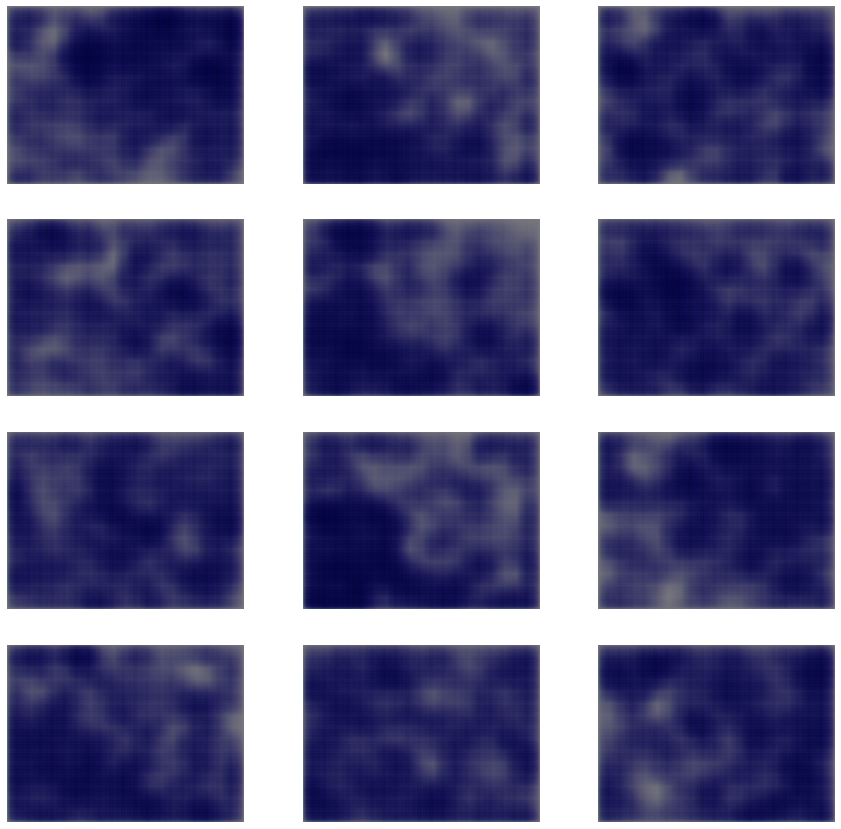

In [100]:
# Plot das imagens geradas
fig = plt.figure(figsize = (15, 15))
columns = 3
rows = 4
for i in range(rows*columns): 
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(output_x[i])
    plt.axis('off')
plt.show()